# Habitat suitability under climate change

[Our changing climate is changing where key grassland species can live,
and grassland management and restoration practices will need to take
this into
account.](https://www.frontiersin.org/articles/10.3389/fpls.2017.00730/full)

In this coding challenge, you will create a habitat suitability model
for a species of your choice that lives in the continental United States
(CONUS). We have this limitation because the downscaled climate data we
suggest, the [MACAv2 dataset](https://www.climatologylab.org/maca.html),
is only available in the CONUS – if you find other downscaled climate
data at an appropriate resolution you are welcome to choose a different
study area. If you don’t have anything in mind, you can take a look at
Sorghastrum nutans, a grass native to North America. [In the past 50
years, its range has moved
northward](https://www.gbif.org/species/2704414).

Your suitability assessment will be based on combining multiple data
layers related to soil, topography, and climate. You will also need to
create a **modular, reproducible, workflow** using functions and loops.
To do this effectively, we recommend planning your code out in advance
using a technique such as pseudocode outline or a flow diagram. We
recommend planning each of the blocks below out into multiple steps. It
is unnecessary to write a step for every line of code unles you find
that useful. As a rule of thumb, aim for steps that cover the major
structures of your code in 2-5 line chunks.

## STEP 1: STUDY OVERVIEW

Before you begin coding, you will need to design your study.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond</div></div><div class="callout-body-container callout-body"><p>What question do you hope to answer about potential future changes in
habitat suitability?</p></div></div>

How does the soil type, temperature, and precipitation influence the habitat 
suitability of sagebrush in the Great Plains?

### Species

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Select the species you want to study, and research it’s habitat
parameters in scientific studies or other reliable sources. You will
want to look for reviews or overviews of the data, since an individual
study may not have the breadth needed for this purpose. In the US, the
National Resource Conservation Service can have helpful fact sheets
about different species. University Extension programs are also good
resources for summaries.</p>
<p>Based on your research, select soil, topographic, and climate
variables that you can use to determine if a particular location and
time period is a suitable habitat for your species.</p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond</div></div><div class="callout-body-container callout-body"><p>What is its geographic range? What, if any, are conservation threats to
the species? What data will shed the most light on habitat suitability
for this species?Write a description of your species. What habitat is it found in?
</p></div></div>

Sagebrush is a critical plant species in the Great Plains ecosystem, providing habitat for many species and playing a crucial role in the region's biodiversity. However, conservation threats like habitat destruction, invasive species, and climate change are putting pressure on sagebrush populations.

### Sites

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Select at least two site to study, such as two of the U.S. National
Grasslands. You can download the <a
href="https://data.fs.usda.gov/geodata/edw/edw_resources/shp/S_USA.NationalGrassland.zip">USFS
National Grassland Units</a> and select your study sites. Generate a
site map for each location.</p>
<p>When selecting your sites, you might want to look for places that are
marginally habitable for this species, since those locations will be
most likely to show changes due to climate.</p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond</div></div><div class="callout-body-container callout-body"><p>Write a site description for each of your sites, or for all of your
sites as a group if you have chosen a large number of linked sites. What
differences or trends do you expect to see among your sites?</p></div></div>

The Missouri River in South Dakota, where sagebrush grows in riparian areas adjacent to water sources. The soil is more fertile and moist compared to the dry, arid regions further west. The climate is slightly more humid, with occasional thunderstorms in the summer, providing more rainfall than other Great Plains areas.

Here, sagebrush communities tend to grow more densely along with other wetlands, such as sedges and willows. The habitat supports a diverse range of wildlife, including waterfowl, small mammals, and reptiles. The sagebrush plants in this area tend to be more robust, growing taller and bushier due to the increased availability of water.

It shows more dense and vigorous sagebrush populations compared to the other sites due to the increased moisture. The richer soil might support more diverse plant communities, but this could also make the area more susceptible to competition from invasive species. The proximity to water sources could make this site a valuable refuge for wildlife during dry spells, providing critical shelter and resources.

### Time periods

In general when studying climate, we are interested in **climate
normals**, which are typically calculated from 30 years of data so that
they reflect the climate as a whole and not a single year which may be
anomalous. So if you are interested in the climate around 2050, download
at least data from 2035-2065.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond</div></div><div class="callout-body-container callout-body"><p>Select at least two 30-year time periods to compare, such as
historical and 30 years into the future. These time periods should help
you to answer your scientific question.</p></div></div>

Historical 1990-2020
 Future 2050-2080

### Climate models

There is a great deal of uncertainty among the many global climate
models available. One way to work with the variety is by using an
**ensemble** of models to try to capture that uncertainty. This also
gives you an idea of the range of possible values you might expect! To
be most efficient with your time and computing resources, you can use a
subset of all the climate models available to you. However, for each
scenario, you should attempt to include models that are:

-   Warm and wet
-   Warm and dry
-   Cold and wet
-   Cold and dry

for each of your sites.

To figure out which climate models to use, you will need to access
summary data near your sites for each of the climate models. You can do
this using the [Climate Futures Toolbox Future Climate Scatter
tool](https://climatetoolbox.org/tool/Future-Climate-Scatter). There is
no need to write code to select your climate models, since this choice
is something that requires your judgement and only needs to be done
once.

If your question requires it, you can also choose to include multiple
climate variables, such as temperature and precipitation, and/or
multiple emissions scenarios, such as RCP4.5 and RCP8.5.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Choose at least 4 climate models that cover the range of possible
future climate variability at your sites. How did you choose?</p></div></div>

The Community Earth System Model (CESM), Hadley Centre Global Environment Model (HadGEM), Climate Forecast System (CFSv2), and North American Regional Climate Change Assessment Program (NARCCAP). These models were chosen to represent a range of emission scenarios and to cover different climate processes like temperature, precipitation, hydrology, and seasonal variability. CESM and HadGEM provide comprehensive global and regional projections, while CFSv2 focuses on short-term climate variability, and NARCCAP offers high-resolution regional simulations, making it useful for studying localized impacts on sagebrush ecosystems.

## STEP 2: DATA ACCESS

### Soil data

The [POLARIS dataset](http://hydrology.cee.duke.edu/POLARIS/) is a
convenient way to uniformly access a variety of soil parameters such as
pH and percent clay in the US. It is available for a range of depths (in
cm) and split into 1x1 degree tiles.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Write a <strong>function with a numpy-style docstring</strong> that
will download POLARIS data for a particular location, soil parameter,
and soil depth. Your function should account for the situation where
your site boundary crosses over multiple tiles, and merge the necessary
data together.</p>
<p>Then, use loops to download and organize the rasters you will need to
complete this section. Include soil parameters that will help you to
answer your scientific question. We recommend using a soil depth that
best corresponds with the rooting depth of your species.</p></div></div>

In [11]:
#%pip install requests
#%pip install numpy
#%pip install rasterio


In [17]:
import os
import requests

# Parameters for POLARIS
parameters = ['ph', 'clay', 'sand']
depth_layer = 4  # 60–100 cm
statistic = 'mean'
data_directory = "soil_data"

# Bounding box for SD
lat_range = [42.0, 43.0, 44.0, 45.0]
lon_range = [-105.0, -104.0, -103.0, -102.0, -101.0, -100.0, -99.0]

# Ensure directory exists
os.makedirs(data_directory, exist_ok=True)

def download_tile(lat, lon, param, depth, stat):
    lat_str = f"{lat:.1f}"
    lon_str = f"{lon:.1f}"
    url = f"http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/30_60"
    tile_filename = f"{data_directory}/tile_{lat_str}_{lon_str}_{param}_{depth}_{stat}.tif"


    if not os.path.exists(tile_filename):
        try:
            print(f"Downloading: {url}")
            response = requests.get(url, timeout=10)
            response.raise_for_status()

            with open(tile_filename, 'wb') as f:
                f.write(response.content)
            print(f"✔️ Downloaded: {tile_filename}")
        except requests.exceptions.RequestException as e:
            print(f"❌ Failed: {tile_filename} | Error: {e}")
    else:
        print(f"✅ Already exists: {tile_filename}")

# Loop through tiles and download each one
for lat in lat_range:
    for lon in lon_range:
        for param in parameters:
            download_tile(lat, lon, param, depth_layer, statistic)



print("\n🎉 All downloads attempted. Check your folder.")



Downloading: http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/30_60


✔️ Downloaded: soil_data/tile_42.0_-105.0_ph_4_mean.tif
Downloading: http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/30_60
✔️ Downloaded: soil_data/tile_42.0_-105.0_clay_4_mean.tif
Downloading: http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/30_60
✔️ Downloaded: soil_data/tile_42.0_-105.0_sand_4_mean.tif
Downloading: http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/30_60
✔️ Downloaded: soil_data/tile_42.0_-104.0_ph_4_mean.tif
Downloading: http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/30_60
✔️ Downloaded: soil_data/tile_42.0_-104.0_clay_4_mean.tif
Downloading: http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/30_60
✔️ Downloaded: soil_data/tile_42.0_-104.0_sand_4_mean.tif
Downloading: http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/30_60
✔️ Downloaded: soil_data/tile_42.0_-103.0_ph_4_mean.tif
Downloading: http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/30_60
✔️ Downloaded: soil_data/tile_42.

### Topographic data

One way to access reliable elevation data is from the [SRTM
dataset](https://www.earthdata.nasa.gov/data/instruments/srtm),
available through the [earthaccess
API](https://earthaccess.readthedocs.io/en/latest/quick-start/).

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Write a <strong>function with a numpy-style docstring</strong> that
will download SRTM elevation data for a particular location and
calculate any additional topographic variables you need such as slope or
aspect.</p>
<p>Then, use loops to download and organize the rasters you will need to
complete this section. Include topographic parameters that will help you
to answer your scientific question.</p></div></div>

> **Warning**
>
> Be careful when computing the slope from elevation that the units of
> elevation match the projection units (e.g. meters and meters, not
> meters and degrees). You will need to project the SRTM data to
> complete this calculation correctly.

In [18]:
# Download soil data
def download_srtm_data(lat, lon, data_directory):

    # Construct the URL
    url = f"https://earthexplorer.usgs.gov/download/SRTM/{lat}_{lon}.tif"
    
    # Check if the file already exists
    file_path = os.path.join(data_directory, f"SRTM_{lat}_{lon}.tif")
    if os.path.exists(file_path):
        print(f"File {file_path} already exists.")
        return file_path
    
    # Attempt to download the data
    try:
        print(f"Downloading data from {url}")
        response = requests.get(url)
        response.raise_for_status()
        
        # Save the downloaded file
        with open(file_path, 'wb') as f:
            f.write(response.content)
        print(f"Successfully downloaded {file_path}")
        
        return file_path
    
    except requests.exceptions.RequestException as e:
        print(f"Failed to download data: {e}")
        return None


In [19]:
def calculate_slope_aspect(elevation_raster):
    
    # Open the raster data using rasterio
    with rasterio.open(elevation_raster) as src:
        elevation_data = src.read(1)  # Read the elevation data as a numpy array
        
        # Calculate the gradient of the elevation data
        dx = sobel(elevation_data, axis=1)  # Gradient in the x-direction
        dy = sobel(elevation_data, axis=0)  # Gradient in the y-direction
        
        # Calculate the slope (in degrees)
        slope = np.arctan(np.sqrt(dx**2 + dy**2)) * (180 / np.pi)
        
        # Calculate the aspect (in degrees)
        aspect = np.arctan2(dy, dx) * (180 / np.pi)
        
        # Ensure the aspect is between 0 and 360 degrees
        aspect = (aspect + 360) % 360
    
    return slope, aspect


In [20]:
def download_and_process_topography(lat_range, lon_range, data_directory):
    
    # Loop over the specified latitude and longitude ranges
    for lat in range(lat_range[0], lat_range[1] + 1):
        for lon in range(lon_range[0], lon_range[1] + 1):
            # Download SRTM data for the current location
            elevation_raster = download_srtm_data(lat, lon, data_directory)
            
            # If the data is downloaded successfully, calculate slope and aspect
            if elevation_raster:
                slope, aspect = calculate_slope_aspect(elevation_raster)
                
                # Optionally, save the slope and aspect rasters as GeoTIFF files
                save_raster(slope, elevation_raster, 'slope', data_directory)
                save_raster(aspect, elevation_raster, 'aspect', data_directory)
                
                print(f"Processed topographic data for lat {lat}, lon {lon}.")
            else:
                print(f"Skipping lat {lat}, lon {lon} due to download failure.")
                
def save_raster(data, template_raster, variable_name, data_directory):
    
    # Open raster to get metadata
    with rasterio.open(template_raster) as src:
        metadata = src.meta
    
    # Update the metadata for the new raster
    
    metadata.update(driver='GTiff', dtype='float32', count=1)
    
    # Define the output file path
    output_path = os.path.join(data_directory, f"{variable_name}_{os.path.basename(template_raster)}")
    
    # Save topographic data as a GeoTIFF
    with rasterio.open(output_path, 'w', **metadata) as dst:
        dst.write(data, 1)
    
    print(f"Saved {variable_name} raster to {output_path}.")


### Climate model data

You can use MACAv2 data for historical and future climate data. Be sure
to compare at least two 30-year time periods (e.g. historical vs. 10
years in the future) for at least four of the CMIP models. Overall, you
should be downloading at least 8 climate rasters for each of your sites,
for a total of 16. **You will *need* to use loops and/or functions to do
this cleanly!**.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Write a <strong>function with a numpy-style docstring</strong> that
will download MACAv2 data for a particular climate model, emissions
scenario, spatial domain, and time frame. Then, use loops to download
and organize the 16+ rasters you will need to complete this section. The
<a
href="http://thredds.northwestknowledge.net:8080/thredds/reacch_climate_CMIP5_macav2_catalog2.html">MACAv2
dataset is accessible from their Thredds server</a>. Include an
arrangement of sites, models, emissions scenarios, and time periods that
will help you to answer your scientific question.</p></div></div>

In [22]:
%pip install xarray netCDF4 requests


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 35.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 55.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
# Download climate data
import os
import xarray as xr

def download_macav2_data(variable, model, scenario, domain, start_year, end_year, output_dir):
    """
    Download MACAv2 climate data for a specific configuration.

    Parameters
    ----------
    variable : str
        Climate variable (e.g., 'tasmax', 'tasmin', 'pr').
    model : str
        GCM model name (e.g., 'BNU-ESM').
    scenario : str
        Emissions scenario ('rcp45' or 'rcp85').
    domain : str
        Geographic domain string (e.g., 'CONUS').
    start_year : int
        Start year of the time series.
    end_year : int
        End year of the time series.
    output_dir : str
        Path to the folder where data will be saved.

    Returns
    -------
    str
        Path to the downloaded NetCDF file.
    """
    base_url = "https://thredds.northwestknowledge.net:8443/thredds/fileServer/MACAV2METDATA"
    filename = f"{variable}_{model}_{scenario}_{domain}_{start_year}_{end_year}.nc"
    url = f"{base_url}/{variable}/{filename}"
    
    os.makedirs(output_dir, exist_ok=True)
    filepath = os.path.join(output_dir, filename)

    if os.path.exists(filepath):
        print(f"✅ Already downloaded: {filename}")
        return filepath

    try:
        print(f"⬇️  Downloading {filename}...")
        xr.open_dataset(url).to_netcdf(filepath)
        print(f"✅ Downloaded to {filepath}")
    except Exception as e:
        print(f"❌ Failed to download {filename}: {e}")
    
    return filepath


In [25]:
# # South Dakota 
# variables = ['tasmax', 'tasmin', 'pr']
# models = ['BNU-ESM', 'CNRM-CM5', 'HadGEM2-ES']  # Add more if needed
# scenarios = ['rcp45', 'rcp85']
# domain = 'CONUS'
# start_year, end_year = 2020, 2050
# output_dir = 'macav2_data'

# # Loop and download
# for var in variables:
#     for model in models:
#         for scenario in scenarios:
#             download_macav2_data(
#                 variable=var,
#                 model=model,
#                 scenario=scenario,
#                 domain=domain,
#                 start_year=start_year,
#                 end_year=end_year,
#                 output_dir=output_dir
#             )


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond</div></div><div class="callout-body-container callout-body"><p>Make sure to include a description of the climate data and how you
selected your models. Include a citation of the MACAv2 data</p></div></div>

YOUR CLIMATE DATA DESCRIPTION AND CITATIONS HERE

## STEP 3: HARMONIZE DATA

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Make sure that the grids for all your data match each other. Check
out the <a
href="https://corteva.github.io/rioxarray/stable/examples/reproject_match.html#Reproject-Match"><code>ds.rio.reproject_match()</code>
method</a> from <code>rioxarray</code>. Make sure to use the data source
that has the highest resolution as a template!</p></div></div>

> **Warning**
>
> If you are reprojecting data as you need to here, the order of
> operations is important! Recall that reprojecting will typically tilt
> your data, leaving narrow sections of the data at the edge blank.
> However, to reproject efficiently it is best for the raster to be as
> small as possible before performing the operation. We recommend the
> following process:
>
>     1. Crop the data, leaving a buffer around the final boundary
>     2. Reproject to match the template grid (this will also crop any leftovers off the image)

In [ ]:
#%pip install rioxarray


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 53.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
# Download soil data
import rioxarray as rxr
import xarray as xr
import os

def reproject_to_match(source_path, template_path, output_path):
    """
    Reprojects a source raster to match the spatial resolution, CRS, and extent of a template raster.

    Parameters
    ----------
    source_path : str
        Path to the source raster to be reprojected.
    template_path : str
        Path to the high-resolution template raster.
    output_path : str
        Path to save the reprojected raster.

    Returns
    -------
    None
        Writes the reprojected raster to disk.
    """
    try:
        source_ds = rxr.open_rasterio(source_path, masked=True).squeeze()
        template_ds = rxr.open_rasterio(template_path, masked=True).squeeze()

        # Reproject to match the template grid
        reprojected = source_ds.rio.reproject_match(template_ds)
        reprojected.rio.to_raster(output_path)
        print(f"✅ Reprojected and saved: {output_path}")
    except Exception as e:
        print(f"❌ Failed to reproject {source_path} | Error: {e}")


## STEP 4: DEVELOP A FUZZY LOGIC MODEL

A fuzzy logic model is one that is built on expert knowledge rather than
training data. You may wish to use the
[`scikit-fuzzy`](https://pythonhosted.org/scikit-fuzzy/) library, which
includes many utilities for building this sort of model. In particular,
it contains a number of **membership functions** which can convert your
data into values from 0 to 1 using information such as, for example, the
maximum, minimum, and optimal values for soil pH.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>To train a fuzzy logic habitat suitability model:</p>
<pre><code>1. Research S. nutans, and find out what optimal values are for each variable you are using (e.g. soil pH, slope, and current climatological annual precipitation). 
2. For each **digital number** in each raster, assign a **continuous** value from 0 to 1 for how close that grid square is to the optimum range (1=optimal, 0=incompatible). 
3. Combine your layers by multiplying them together. This will give you a single suitability number for each square.
4. Optionally, you may apply a suitability threshold to make the most suitable areas pop on your map.</code></pre></div></div>

> **Tip**
>
> If you use mathematical operators on a raster in Python, it will
> automatically perform the operation for every number in the raster.
> This type of operation is known as a **vectorized** function. **DO NOT
> DO THIS WITH A LOOP!**. A vectorized function that operates on the
> whole array at once will be much easier and faster.

In [35]:
#%pip install scikit-fuzzy
%pip install scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 55.3 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [36]:
# Create fuzzy logic suitability model
import numpy as np
import skfuzzy as fuzz

x_pH = np.arange(4, 9.1, 0.1)
optimal_pH = fuzz.trimf(x_pH, [6.0, 6.75, 7.5])  # Triangular MF


## STEP 5: PRESENT YOUR RESULTS

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Generate some plots that show your key findings. Don’t forget to
interpret your plots!</p></div></div>

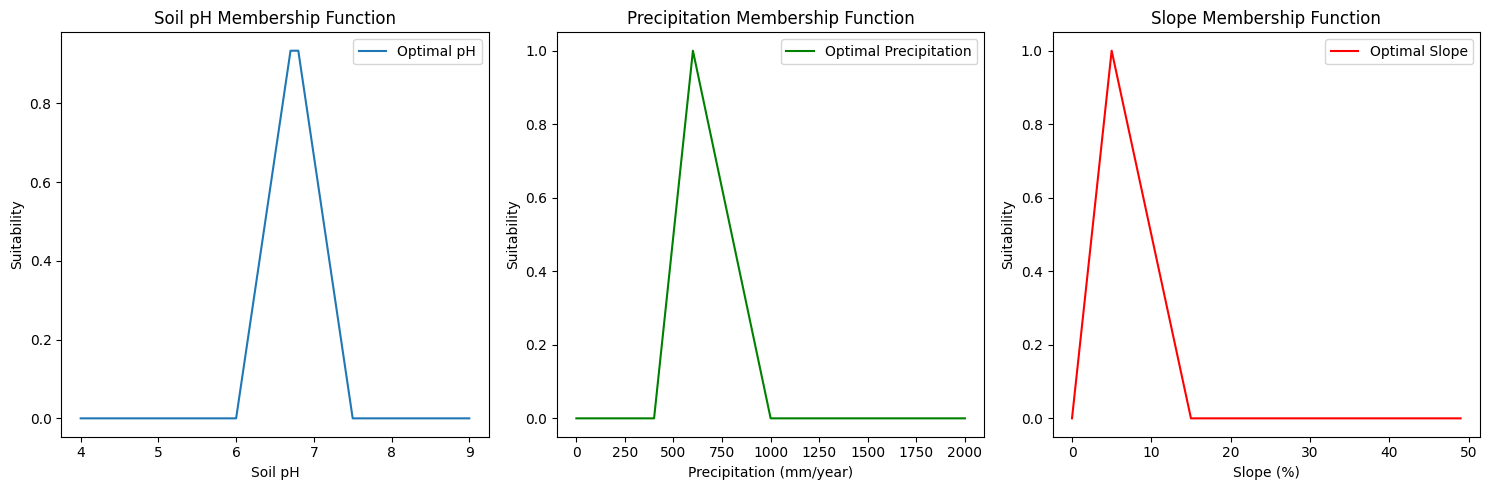

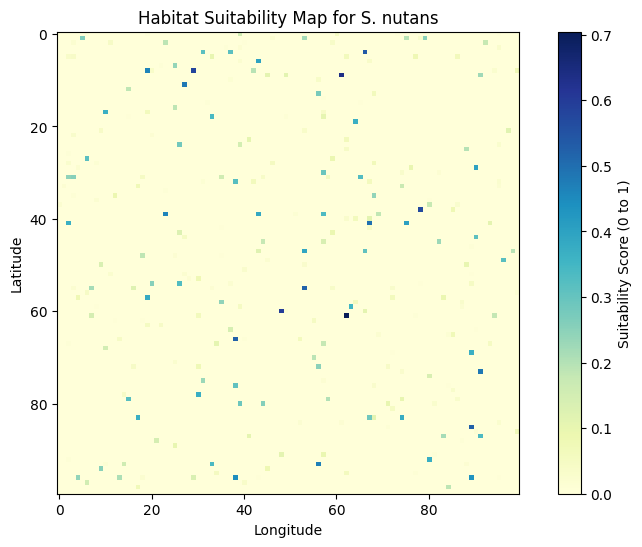

In [41]:
# Create plots
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Example membership functions
# Soil pH range
x_pH = np.arange(4, 9.1, 0.1)
optimal_pH = fuzz.trimf(x_pH, [6.0, 6.75, 7.5])  # Triangular MF for optimal pH

# Precipitation range (example)
x_precip = np.arange(0, 2001, 1)
optimal_precip = fuzz.trimf(x_precip, [400, 600, 1000])  # Triangular MF for optimal precip

# Slope range (example)
x_slope = np.arange(0, 50, 1)
optimal_slope = fuzz.trimf(x_slope, [0, 5, 15])  # Triangular MF for optimal slope

# Plot Membership Functions
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.plot(x_pH, optimal_pH, label="Optimal pH")
ax1.set_title("Soil pH Membership Function")
ax1.set_xlabel("Soil pH")
ax1.set_ylabel("Suitability")
ax1.legend()

ax2.plot(x_precip, optimal_precip, label="Optimal Precipitation", color='g')
ax2.set_title("Precipitation Membership Function")
ax2.set_xlabel("Precipitation (mm/year)")
ax2.set_ylabel("Suitability")
ax2.legend()

ax3.plot(x_slope, optimal_slope, label="Optimal Slope", color='r')
ax3.set_title("Slope Membership Function")
ax3.set_xlabel("Slope (%)")
ax3.set_ylabel("Suitability")
ax3.legend()

plt.tight_layout()
plt.show()

# Now, combine suitability scores for pH, slope, and precipitation
# Example raster data (simulated)
n = 100  # Grid size
pH_layer = np.random.uniform(4, 9, size=(n, n))  # Random pH values for demonstration
precip_layer = np.random.uniform(0, 2000, size=(n, n))  # Random precipitation values
slope_layer = np.random.uniform(0, 50, size=(n, n))  # Random slope values

# Apply fuzzy logic (membership function) to these layers
pH_suitability = fuzz.interp_membership(x_pH, optimal_pH, pH_layer)
precip_suitability = fuzz.interp_membership(x_precip, optimal_precip, precip_layer)
slope_suitability = fuzz.interp_membership(x_slope, optimal_slope, slope_layer)

# Combine the suitability layers (multiply for AND operation)
combined_suitability = pH_suitability * precip_suitability * slope_suitability

# Plot the suitability map
plt.figure(figsize=(10, 6))
plt.imshow(combined_suitability, cmap='YlGnBu', interpolation='nearest')
plt.colorbar(label="Suitability Score (0 to 1)")
plt.title("Habitat Suitability Map for S. nutans")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


YOUR PLOT INTERPRETATION HERE